# Breast Cancer Patients Survival Prediction With Machine Learning Models 

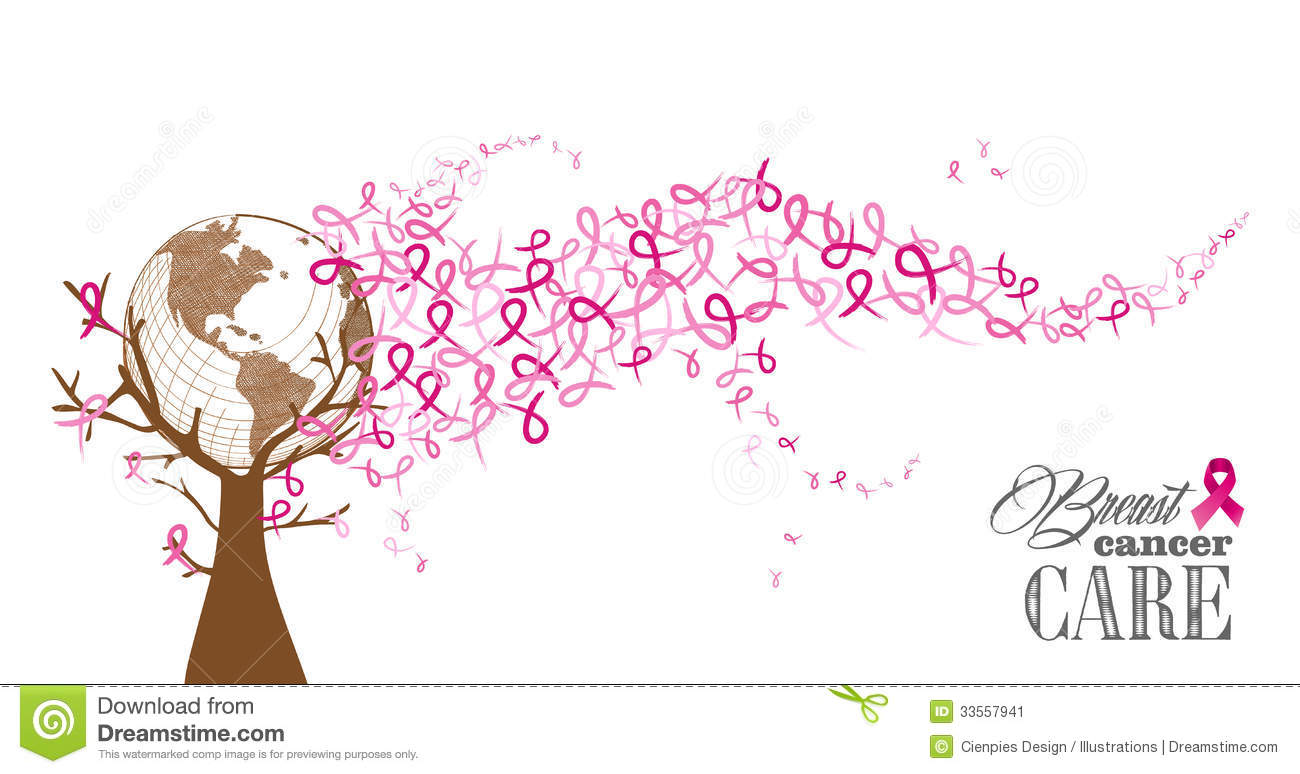

In [53]:
from IPython import display
display.Image("/Users/eunnkyu/Desktop/trgn515/final_project/brca.jpeg")

<a id='Introduction'></a>
## Introduction

Breast cancer is the most frequent cancer among women in the United States. 1 in 8 women in the U.S. develop breast cancer in her life time. Moratlity rate of breast cancer reaches 19.4 in the U.S. in 2019 and it is the second most death rate of all cancers.

Accurate estimation of prognosis and survival duration are the most important steps to make clinical decision-making in patients with cancers. However, prediciting how patients' tumor would behave reliably is difficult because of tumor heterogeity and limitation of our current cancer classfication.

Using machine learning techniques on clinical and/or genetic data has the potentials of giving the correct estimation of survival time and can prevent unnecessary surgical and treatment procedures. Furthermore, it can save cancer patients' lives.

### Contents:

- [Dataset Description](#Dataset-Description)
 
- [Import Libraries & Dataset](#Import-Library-&-Dataset)
-[Data Visualization & Cleaning](#Data-Visualization-&-Cleaning)
  - [Missing Values](#Missing-Values)
  - [Outliers](#Outliers)
  - [Reduce redundant data](#Reduce-redundant-data)
  - [Target](#Target)
-[Machine Learning](#Machine-Learning)
  - [Make Predictions With Clinical Data](#Make-Predictions-With-Clinical-Data)
  - [Make Predictions With Expression Data](#Make-Predictions-With-Expression-Data)
  - [Make Predicitons With Combined Data](#Make-Predicitons-With-Combined-Data)

## Dataset Description

The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples. Clinical and genomic data was downloaded from [Kaggle](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/download?datasetVersionNumber=1).

The dataset was collected by Professor Carlos Caldas from Cambridge Research Institute and Professor Sam Aparicio from the British Columbia Cancer Centre in Canada and published on Nature Communications [Pereira et al., 2016](https://www.nature.com/articles/s41523-018-0056-8). 

## Import Library & Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Loading the datset
df = pd.read_csv('METABRIC_RNA_Mutation.csv', sep=',', low_memory=False)

In [3]:
# Check the general data structure
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


In [4]:
# Take a glance at the dataset
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization & Cleaning

In [5]:
# The dataset can be classified into three catagories: clinical data with 31 attributes
# mRNA expression (z-score) of 331 gene, and mutation annotation of 173 genes
clinic_df = df.loc[:,'patient_id':'death_from_cancer']
expression_df = df.loc[:,'brca1':'ugt2b7']
mutation_df = df.loc[:,'pik3ca_mut':'siah1_mut']

In [6]:
# First look at Clinical Data
clinic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

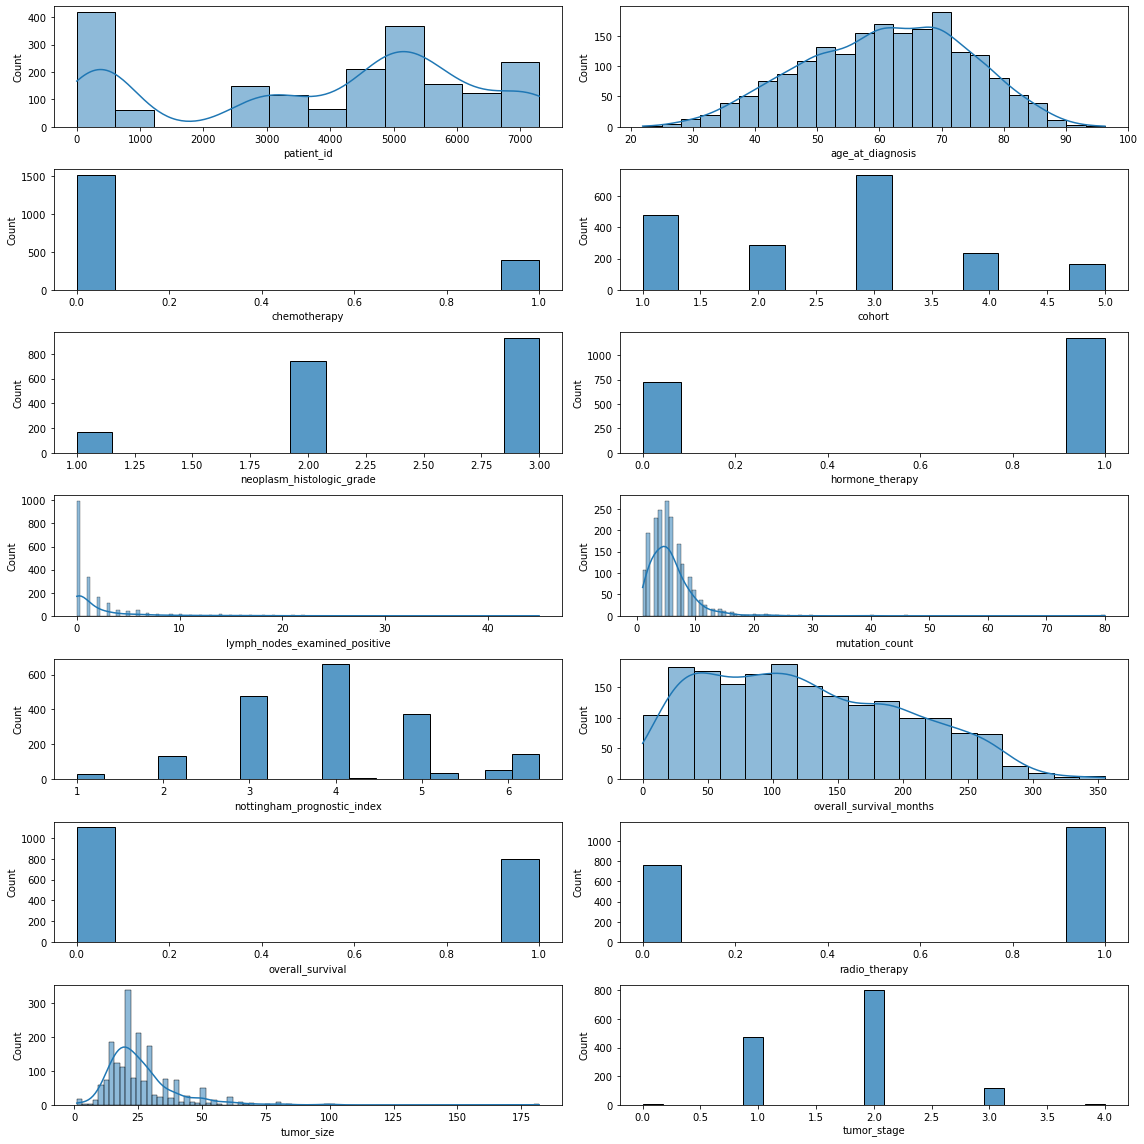

In [7]:
# Let's Look at distributions of clinical attributes with number as their values
fig, axs = plt.subplots(7, 2, figsize = (16,16))

sns.histplot(data=clinic_df, x="patient_id", kde=True, ax=axs[0, 0])
sns.histplot(data=clinic_df, x="age_at_diagnosis", kde=True, ax=axs[0, 1])
sns.histplot(data=clinic_df, x="chemotherapy", ax=axs[1, 0])
sns.histplot(data=clinic_df, x="cohort", ax=axs[1, 1])
sns.histplot(data=clinic_df, x="neoplasm_histologic_grade", ax=axs[2, 0])
sns.histplot(data=clinic_df, x="hormone_therapy", ax=axs[2, 1])
sns.histplot(data=clinic_df, x="lymph_nodes_examined_positive", kde=True, ax=axs[3, 0])
sns.histplot(data=clinic_df, x="mutation_count", kde=True, ax=axs[3, 1])
sns.histplot(data=clinic_df, x="nottingham_prognostic_index", ax=axs[4, 0])
sns.histplot(data=clinic_df, x="overall_survival_months", kde=True, ax=axs[4, 1])
sns.histplot(data=clinic_df, x="overall_survival", ax=axs[5, 0])
sns.histplot(data=clinic_df, x="radio_therapy", ax=axs[5, 1])
sns.histplot(data=clinic_df, x="tumor_size", kde=True, ax=axs[6, 0])
sns.histplot(data=clinic_df, x="tumor_stage", ax=axs[6, 1])

plt.rcParams["xtick.labelsize"] = 7
plt.tight_layout()
plt.show()

### Missing Values

From the histograms, I can notice almost all attributes are skewed distribution except "age at diagnosis". So I must check if there are outliers in those attributes with skewed distribution.

In [8]:
# Let's check if there are missing values in the data first!!
total_missing_value = df.isnull().sum().sort_values(ascending = False)
pecent_missing_value = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
missing_data = pd.concat([total_missing_value, pecent_missing_value], axis = 1, keys = ['Total_NaN', 'Percent_NaN'])
missing_data.head(15) 

,Total_NaN,Percent_NaN
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
cancer_type_detailed,15,0.787815


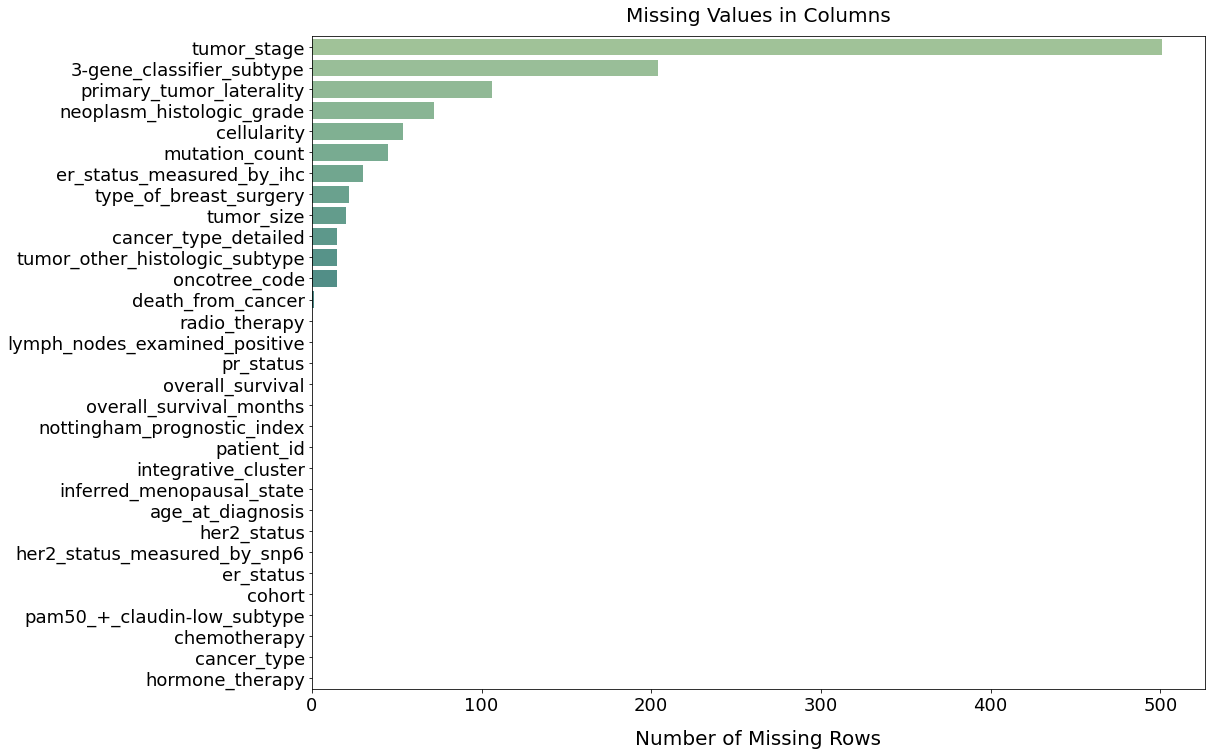

In [9]:
# Bar graph of attributes with missing values
fig = plt.figure(figsize=(16, 12))

sns.barplot(x=clinic_df.isnull().sum().sort_values(ascending=False).values,
            y=clinic_df.isnull().sum().sort_values(ascending=False).index,
            palette='crest')

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

I notice that only clinical data contains missing values and the highest one is the "tumor stage" with 501 missing values (26.3%). I will replace those missing values in two different ways. First, with continous variables, I will replace them with either mean or median of its attribute depending on its distribution: mean for normal distribution and median for skewed distribution. Second, for categorical variables, I will replace them with mode.

In [12]:
# Replacing missing values
clinic_df['cancer_type_detailed'].fillna(clinic_df['cancer_type_detailed'].mode()[0], inplace=True)
clinic_df['cellularity'].fillna(clinic_df['cellularity'].mode()[0], inplace=True)
clinic_df['tumor_stage'].fillna(clinic_df['tumor_stage'].mode()[0], inplace=True)
clinic_df['3-gene_classifier_subtype'].fillna(clinic_df['3-gene_classifier_subtype'].mode()[0], inplace=True)
clinic_df['primary_tumor_laterality'].fillna(clinic_df['primary_tumor_laterality'].mode()[0], inplace=True)
clinic_df['neoplasm_histologic_grade'].fillna(clinic_df['neoplasm_histologic_grade'].mode()[0], inplace=True)
clinic_df['mutation_count'].fillna(clinic_df['mutation_count'].median(), inplace=True)
clinic_df['er_status_measured_by_ihc'].fillna(clinic_df['er_status_measured_by_ihc'].mode()[0], inplace=True)
clinic_df['type_of_breast_surgery'].fillna(clinic_df['type_of_breast_surgery'].mode()[0], inplace=True)
clinic_df['tumor_size'].fillna(clinic_df['tumor_size'].median(), inplace=True)
clinic_df['tumor_other_histologic_subtype'].fillna(clinic_df['tumor_other_histologic_subtype'].mode()[0], inplace=True)
clinic_df['oncotree_code'].fillna(clinic_df['oncotree_code'].mode()[0], inplace=True)
clinic_df['death_from_cancer'].fillna(clinic_df['death_from_cancer'].mode()[0], inplace=True)

### Outliers

In [13]:
clinic_outlier = clinic_df.loc[:, ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'nottingham_prognostic_index', 
                                   'mutation_count', 'overall_survival_months', 'tumor_size']]

<AxesSubplot:title={'center':'The Distribution of Clinical Attributes'}>

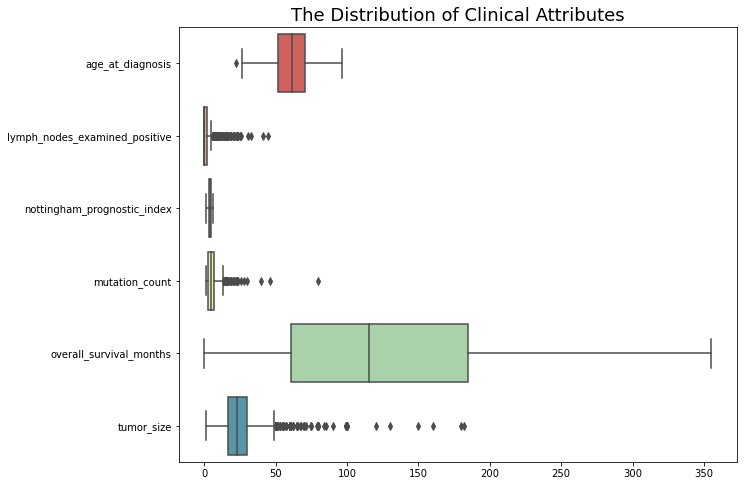

In [14]:
# Box-plot
ax, fig = plt.subplots(1, 1, figsize = (10, 8))
plt.title('The Distribution of Clinical Attributes', fontsize = 18)
plt.tick_params(labelsize= 10)

sns.boxplot(data = clinic_outlier, palette = 'Spectral', orient = 'h')

It seems that "lymph nodes examined positive", "mutation count", and "tumor size" contain some outliers at the very long end but the others closed to the whiskers may contain some useful information when I consider the distribution of them. For this reason, I would like to take transformation methods to handle the outliers.

In [15]:
# See how many outliers are present
Q1 = clinic_outlier.quantile(0.25)
Q3 = clinic_outlier.quantile(0.75)
IQR = Q3 - Q1
((clinic_outlier < (Q1 - 1.5 * IQR)) | (clinic_outlier > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False).head()

lymph_nodes_examined_positive    210
tumor_size                       142
mutation_count                    62
age_at_diagnosis                   1
nottingham_prognostic_index        0
dtype: int64

In [17]:
test_df = clinic_df.loc[:, ['lymph_nodes_examined_positive', 'mutation_count', 'tumor_size']]

<AxesSubplot:>

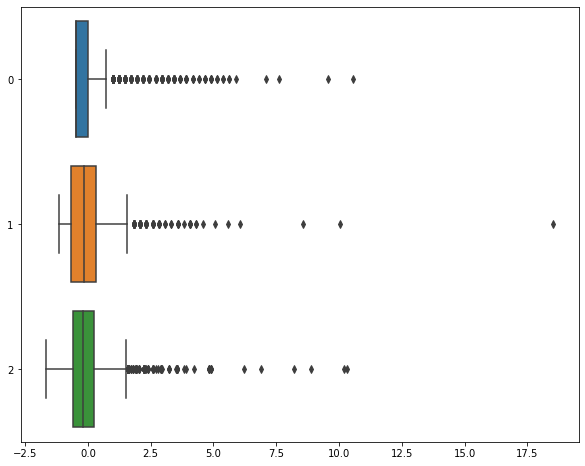

In [18]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_df = scaler.fit_transform(test_df)
ax, fig = plt.subplots(1, 1, figsize = (10, 8))
plt.tick_params(labelsize= 10)
sns.boxplot(data = scale_df, orient = 'h')

<AxesSubplot:>

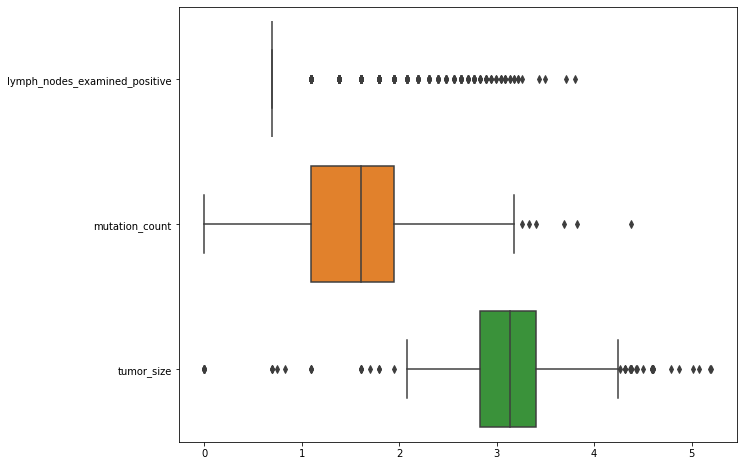

In [19]:
# log transformation
ax, fig = plt.subplots(1, 1, figsize = (10, 8))
plt.tick_params(labelsize= 10)
test_df = clinic_df.loc[:,['lymph_nodes_examined_positive', 'mutation_count', 'tumor_size']]
log_test = np.log(test_df)
sns.boxplot(data = log_test, orient = 'h')

<AxesSubplot:>

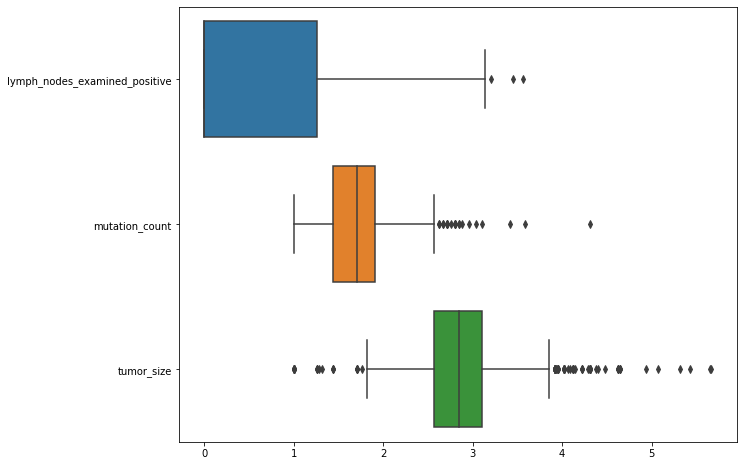

In [20]:
# Cube root transformation
ax, fig = plt.subplots(1, 1, figsize = (10, 8))
plt.tick_params(labelsize= 10)
cube_test = test_df**(1/3)
sns.boxplot(data = cube_test, orient = 'h')

Cube root normalization looks like the best method among the others, because it reduces the most of outliers, especially outliers in "lymph nodes examiend positive".

In [21]:
# It seems that the cube root transformation is the best approach for handling the outliers.
clinic_df['lymph_nodes_examined_positive'] = np.cbrt(clinic_df['lymph_nodes_examined_positive'])
clinic_df['mutation_count'] = np.cbrt(clinic_df['mutation_count'])
clinic_df['tumor_size'] = np.cbrt(clinic_df['tumor_size'])

### Reduce redundant data

To compare the featutres, they must be in same format. Here I transform the features containing string (object) into the numbers with LabelEncoder.

In [22]:
# In order to get correlation coefficient between different features, they must be chagned into numbers
# Here I slice the data with object data type
object_cols = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity',
               'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status',
               'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state',
               'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status',
               'tumor_size', 'tumor_size', 'death_from_cancer']

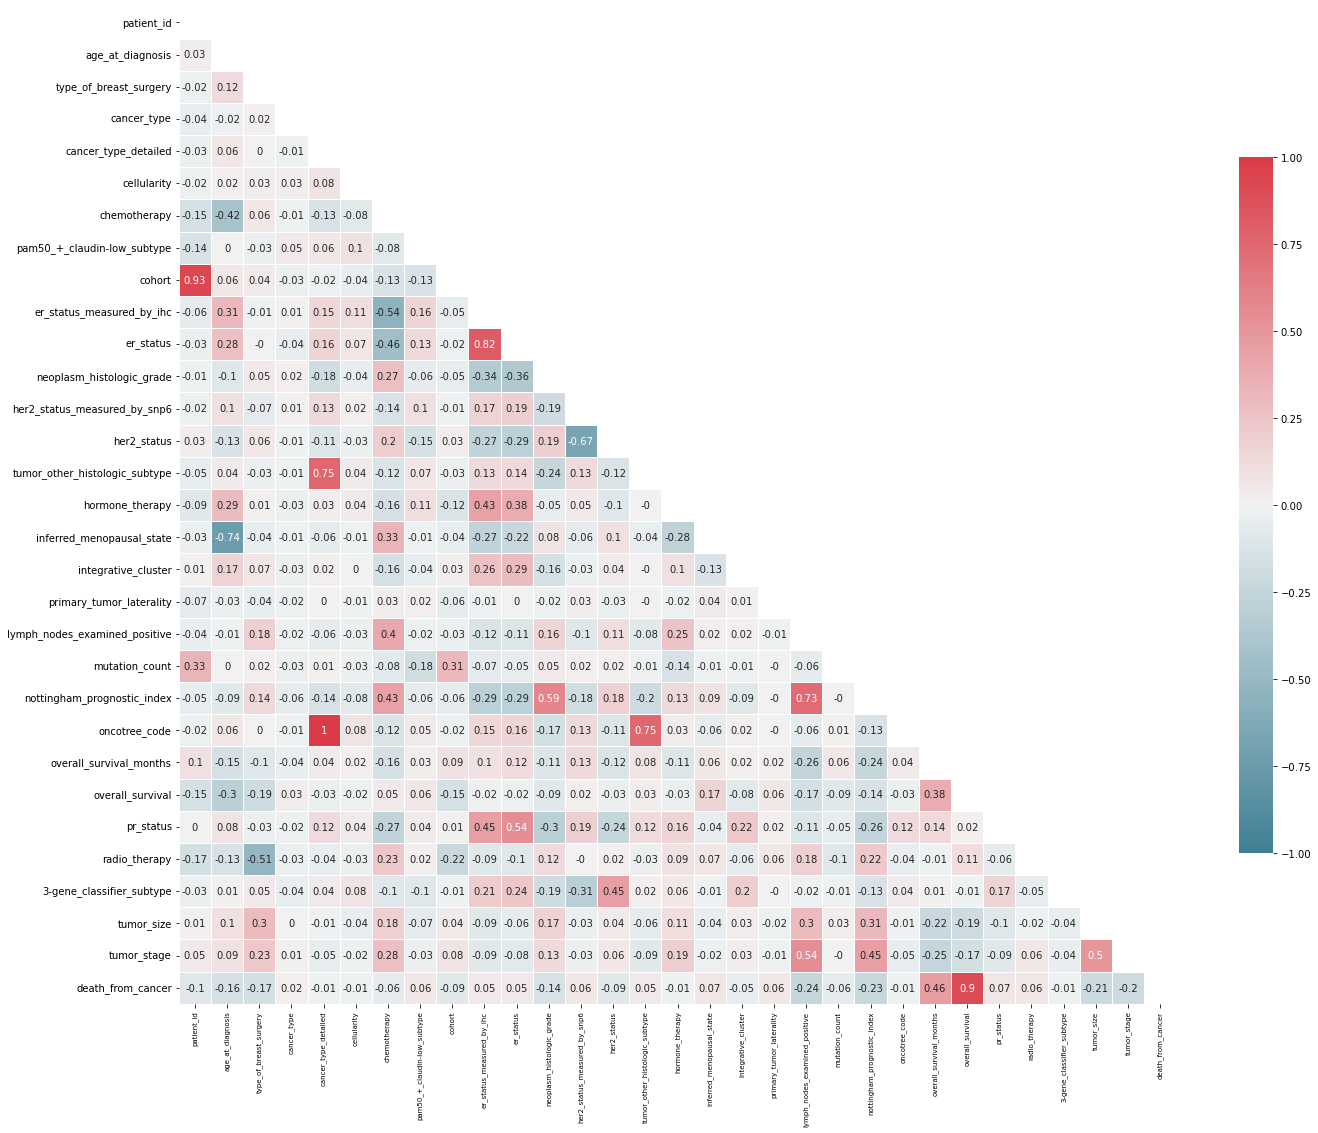

In [23]:
for col in object_cols:
    clinic_df[col] = np.uint8(LabelEncoder().fit_transform(clinic_df[col]))

# I had to separate the 3-gene_classifier_subtype due to an error.
clinic_df['3-gene_classifier_subtype'] = np.uint8(clinic_df['3-gene_classifier_subtype'].map({'ER-/HER2-': 0, 'ER+/HER2- High Prolif': 1, 'ER+/HER2- Low Prolif': 2, 'HER2+': 3}))

# Correlation of clinical data
corr = clinic_df.corr().round(2)

# Masking uppder part of the triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generating correlation heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

#plt.savefig('corr_heatmap.png', dpi = 200)

I set the correlation cutoff as > |0.7| and drop the attributes based on it along with "her2_status", "patient_id" and "death_from_cancer". 

In [24]:
# They are qualified with cutoff > |0.7| correlational coefficient 
# I also drop "patient id" and "cancer type", because their information is not useful at all.
# Even if the correlation coefficient between "her2 status" and "her2 status measured by snp6" was -0.67,
# I dropped "her2 status measured by snp6", because its number is so close to |0.7| and similarity.
drop_cols = ['patient_id', 'cancer_type', 'death_from_cancer', 'her2_status_measured_by_snp6', 
             'er_status_measured_by_ihc', 'cancer_type_detailed', 
             'primary_tumor_laterality', 'tumor_other_histologic_subtype', 'oncotree_code', 
             'inferred_menopausal_state', 'lymph_nodes_examined_positive']

In [25]:
# Drop the columns
clinic_df.drop(columns= drop_cols, inplace=True)

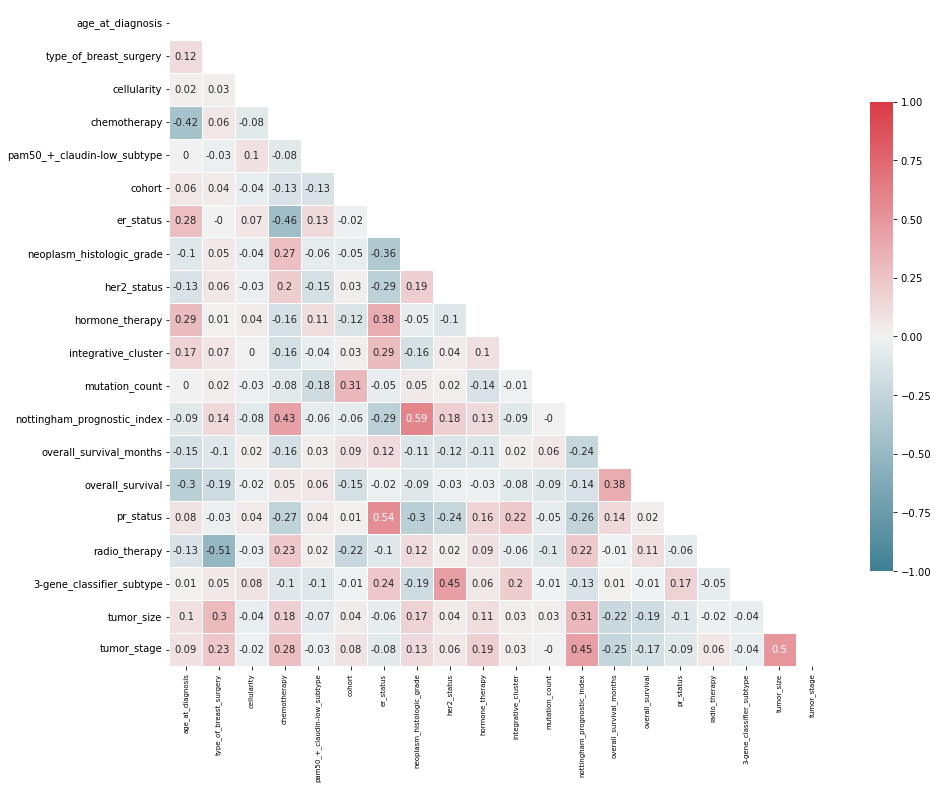

In [26]:
# Confirm the drop of the selected columns
corr = clinic_df.corr().round(2)

# Masking uppder part of the triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generating correlation heatmap
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()
plt.savefig('corr_heatmap_after.png', dpi = 200)

In [28]:
expression_df['overall_survival'] = clinic_df['overall_survival']

Text(0.5, 1.0, 'Histogram of Correlation of genes with the survival')

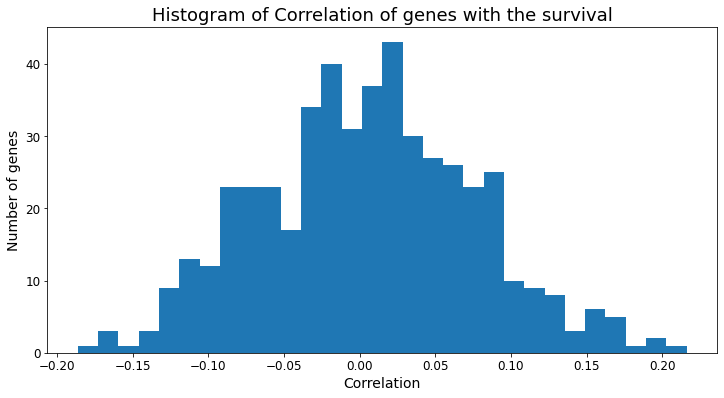

In [29]:
# Because generating correlation heatmap of the gene expression data is not efficient.
# I generate histoplot of correlation coefficients to check their distribution
fig, ax = plt.subplots(figsize=(12,6))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in expression_df:
    corr = expression_df[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=30)
ax.set_xlabel("Correlation", size=14)
ax.set_ylabel("Number of genes", size=14)
plt.tick_params(labelsize= 12)
ax.set_title("Histogram of Correlation of genes with the survival", size=18)

Most correlation coefficients are inbetween -0.2 and 0.2. It's good to go

### Target

There are 3 different attributes related to my target. They are "overall survival months", "overall survival", and "death from cancer". Let's take a look of their distributions.

<AxesSubplot:title={'center':'The Distribution of Overall Survival Months'}, xlabel='overall_survival_months', ylabel='Count'>

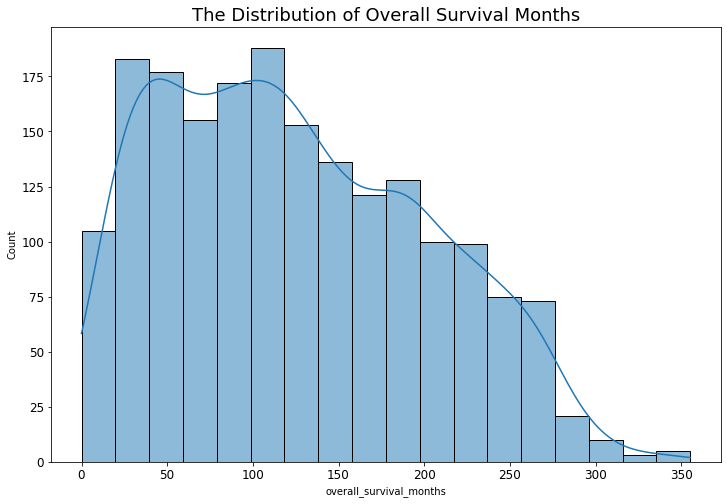

In [30]:
# Histogram of overall survival months
fig = plt.figure(figsize=(12, 8))
plt.title('The Distribution of Overall Survival Months', fontsize = 18)
plt.tick_params(labelsize= 12)
sns.histplot(data=clinic_df, x="overall_survival_months", kde=True)

50% of cancer patients survie more than about 10 years.

<AxesSubplot:title={'center':'The Distribution of Overall Survival'}, xlabel='overall_survival', ylabel='count'>

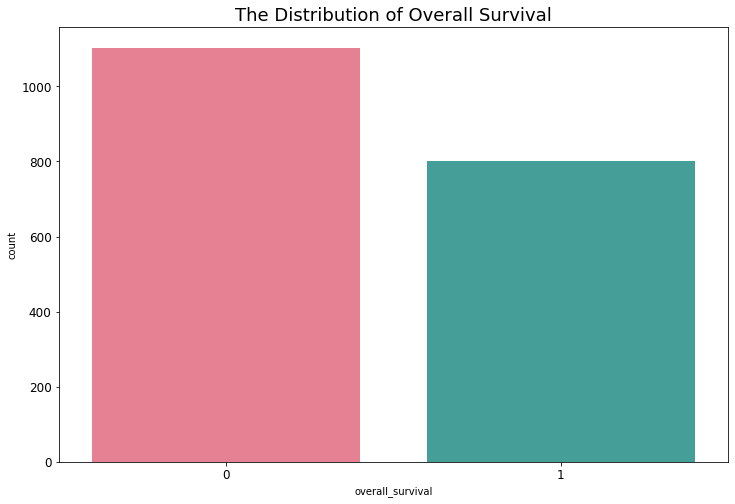

In [31]:
# Barplot of overall survival
# 0 = dead, 1 = living
fig = plt.figure(figsize=(12, 8))      
plt.title('The Distribution of Overall Survival', fontsize = 18)
plt.tick_params(labelsize= 12)
sns.countplot(clinic_df['overall_survival'], data=clinic_df, palette = "husl")

When I look up the distribution of overall survival of patients, there are more deads compare to livings.
Let's take a look more close on the dead group.

<AxesSubplot:xlabel='death_from_cancer', ylabel='count'>

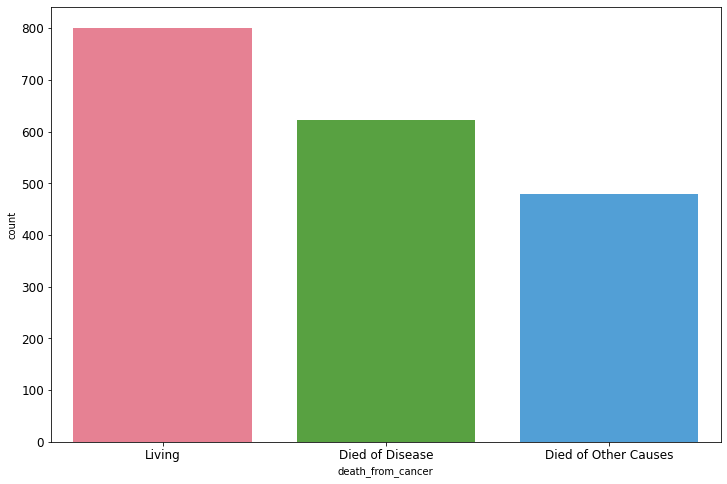

In [32]:
# Barplot of death from cancer
fig = plt.figure(figsize=(12, 8))    
plt.tick_params(labelsize= 12)
sns.countplot(df['death_from_cancer'], data=df, palette = "husl")

Text(0, 0.5, '')

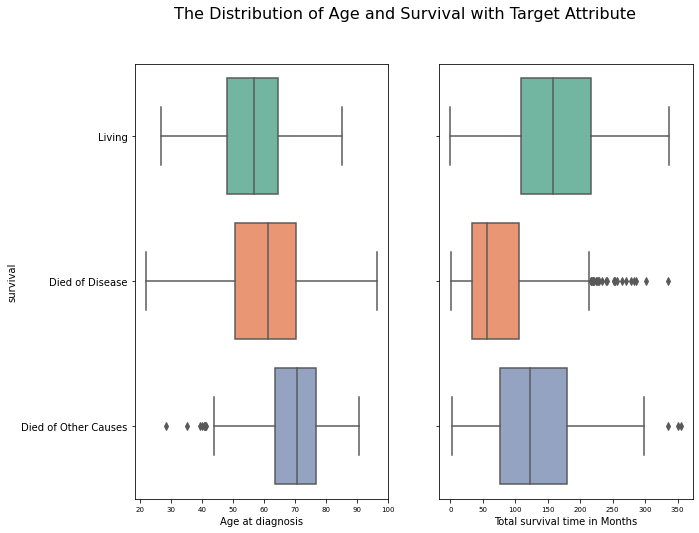

In [36]:
# Visualize the features related with my target
fig, ax = plt.subplots(ncols=2, figsize=(10,8), sharey=True)

sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=df, ax=ax[0], palette = "Set2")
sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=df, ax=ax[1], palette = "Set2")


fig.suptitle('The Distribution of Age and Survival with Target Attribute', fontsize = 16)

ax[0].set_xlabel('Age at diagnosis')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

This bar graph also explains that breast cancer patients who are died from the cancer have shorter survival time compare to survival group.

The other thing I notice from this figures is that many patients died from the other cause show high in their age. This might reflect that they died by age rather than cancer.

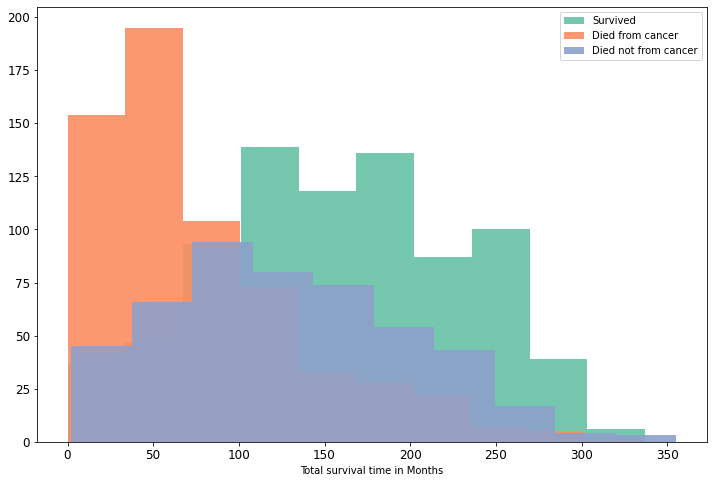

In [38]:
alive = df[df['death_from_cancer']=='Living']
died_cancer = df[df['death_from_cancer']=='Died of Disease']
died_not_cancer = df[df['death_from_cancer']=='Died of Other Causes']

# Visualization of overlapping regions between dead by cancer and dead by other cause
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette("Set2")[0], label='Survived')
ax.hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette("Set2")[1], label='Died from cancer')
ax.hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette("Set2")[2], label='Died not from cancer')
ax.legend()

ax.set_xlabel('Total survival time in Months')
ax.set_ylabel('')
plt.tick_params(labelsize= 12)

Because overall survival counts dead by cancer and dead by other cause overlap eacher, especially before 120 months. If I make a prediction while I include the "dead by other cause" group, this will make interference, so drop "dead by other cause" group in order to make more precise prediction.

In [40]:
# Drop variables with dead by other cause
clinic_df.drop(clinic_df[(df['death_from_cancer'] == 'Died of Other Causes')].index, inplace=True)

<AxesSubplot:title={'center':'The Distribution of Overall Survival After Drop Death by Other Cause'}, xlabel='overall_survival', ylabel='count'>

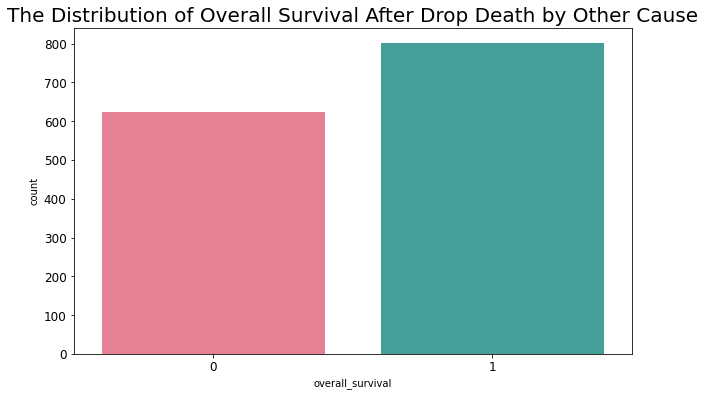

In [41]:
# The Distribution of Overall Survival After Drop Death by Other Cause
fig = plt.figure(figsize=(10, 6))
plt.title('The Distribution of Overall Survival After Drop Death by Other Cause', fontsize = 20)
plt.tick_params(labelsize= 12)
sns.countplot(clinic_df['overall_survival'], data=clinic_df, palette = "husl")

## Machine Learning

### Make Predictions With Clinical Data

In [42]:
# Assigning features and target
X = clinic_df.drop(columns='overall_survival')
y = clinic_df['overall_survival']

# Oversampling by using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 10)
x_smote, y_smote = smote.fit_resample(X, y)

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=3,
                                                   shuffle = True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1121, 19), X_test size: (481, 19)


In [43]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 801, 0: 623})
Resample dataset shape Counter({1: 801, 0: 801})


In [44]:
# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I utilized GridSearchCV to find the best model with an optimized set of hyperparameters.

In [45]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', random_state=15),
            'parameters': {
                'C': [1,5,10]
               }
        },
        'support_vector_classifier': {
            'model': SVC(gamma='auto', random_state=15),
            'parameters': {
                'C': [0.1,1,5,10],
                'kernel': ['rbf', 'poly', 'sigmoid']
               }
        },    
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state=15),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20],
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state=15),
            'parameters': {
                'max_depth': [5,10,20],
                'n_estimators': [10,15,20,50,100,200], 
            }
        },

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.788540
1,support_vector_classifier,"{'C': 1, 'kernel': 'rbf'}",0.795683
2,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.778774
3,random_forest,"{'max_depth': 20, 'n_estimators': 200}",0.829587


The best accuracy is attained by Random Forest model, of 83%

In [46]:
X = clinic_df.drop(columns='overall_survival')
y = clinic_df['overall_survival']

# Oversampling by using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 10)
x_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=3,
                                                   shuffle = True)
# Scaling and transformation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
rfm = RandomForestClassifier(criterion='gini', max_depth = 10, n_estimators = 200, random_state=15)
rfm.fit(X_train, y_train)
score = rfm.score(X_test, y_test)
print('testing dataset accuracy:; ', score)

testing dataset accuracy:;  0.8253638253638254


Accuracies from training and testing data are very closed to each other. This is a good sign since Random Forest model tends to do overfitting. Let's see the confusion matrix on the next

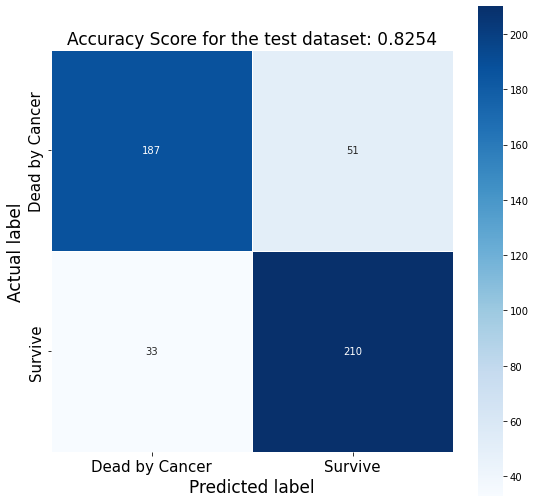

In [48]:
cm = metrics.confusion_matrix(y_test, rfm.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt="",
            linewidths=.5,
            square = True,
            cmap = 'Blues', 
            xticklabels = ['Dead by Cancer', 'Survive'],
            yticklabels = ['Dead by Cancer', 'Survive']
            );
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score for the test dataset: {}'.format(score.round(4)), size = 17);
plt.tick_params(labelsize= 15)

__True Positive (TP):__ Patients who survived were classified as survived (Bottom Right)\
__True Negative (TN):__ Patients who died were classified as died (Top Left)\
__False Positive (FP):__ Patients who died and were classified as survive (Top Right)\
__False Negative (FN):__ Patients who survive and were classified as died (Bottom Left)

Above all, false positive is the worst case scnario because the model predicts the patients as survive but they are died from the cancer, because they couldn't have enough medical cares.

The number of false positive is pretty high in my model, even comparing with false negative cases. The improving the model is not avoidable.


 1) overall_survival_months        0.334003
 2) nottingham_prognostic_index    0.107827
 3) age_at_diagnosis               0.099444
 4) 3-gene_classifier_subtype      0.074243
 5) cohort                         0.072980
 6) mutation_count                 0.051429
 7) integrative_cluster            0.043613
 8) pam50_+_claudin-low_subtype    0.036766
 9) neoplasm_histologic_grade      0.032992
10) tumor_size                     0.024210
11) radio_therapy                  0.023840
12) cellularity                    0.016870
13) overall_survival               0.014846
14) hormone_therapy                0.014419
15) pr_status                      0.013107
16) type_of_breast_surgery         0.013020
17) er_status                      0.010003
18) chemotherapy                   0.009892
19) her2_status                    0.006494


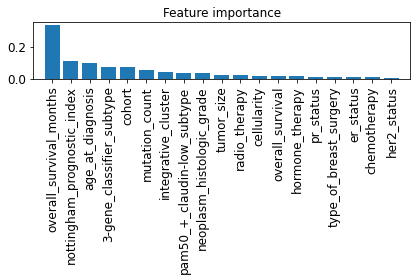

In [49]:
feat_labels = clinic_df.columns[:]
importances = rfm.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.tick_params(labelsize= 12)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('diabetes_features_ranked.png', dpi=200)
plt.show()

Not all features have same importance. Some features take more higher priority than the others.

The features importances in my random forest model, "overall survival monts" has the most importance of all to make correct decision. However, this features is not attainable unless the patients died from dieases so that I cannot get the information when I make a predicition in real life. So I have to get rid of it.

### Make Predictions With Expression Data

In [97]:
# I have to balance out the number of samples in expression data as I drop "Died of Other Cause" group
# containig clinical data
df.drop(df[(df['death_from_cancer'] == 'Died of Other Causes')].index, inplace=True)
expression_df = df.loc[:,'brca1':'ugt2b7']

In [100]:
# Adding target variable once again
expression_df['overall_survival'] = clinic_df['overall_survival']

In [101]:
X = expression_df.drop(columns='overall_survival')
y = expression_df['overall_survival']

In [102]:
smote = SMOTE(random_state = 10)
x_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=3,
                                                   shuffle = True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1121, 489), X_test size: (481, 489)


In [103]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 801, 0: 623})
Resample dataset shape Counter({1: 801, 0: 801})


In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', random_state=15),
            'parameters': {
                'C': [1,5,10]
               }
        },
         'support_vector_classifier': {
            'model': SVC(gamma='auto', random_state=15),
            'parameters': {
                'C': [0.1,1,5,10],
                'kernel': ['rbf', 'poly', 'sigmoid']
               }
        },    
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state=15),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20],
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state=15),
            'parameters': {
                'max_depth': [5,10,20],
                'n_estimators': [10,15,20,50,100,200], 
            }
        },

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = 4, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.644046
1,support_vector_classifier,"{'C': 5, 'kernel': 'poly'}",0.696695
2,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.599460
3,random_forest,"{'max_depth': 20, 'n_estimators': 200}",0.677075


For expression data, support vector machine scores the highest accuracy, which was 69.7%. This is lower than I have for clinical data.

In [106]:
svm_ex = SVC(gamma='auto', C=10, kernel='rbf', random_state=10)
svm_ex.fit(X_train, y_train)
score = svm_ex.score(X_test, y_test)
print('testing dataset accuracy:; ', score)

testing dataset accuracy:;  0.7255717255717256


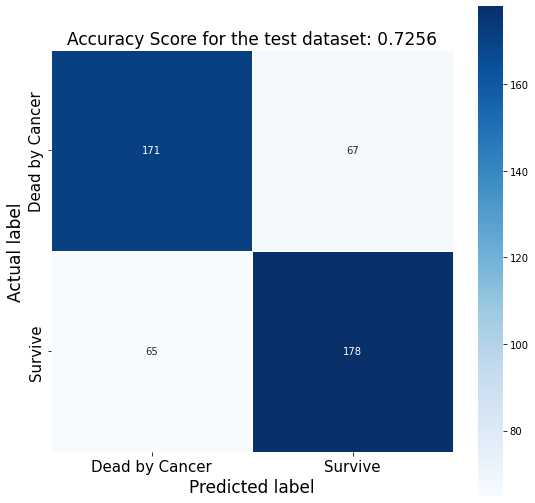

In [107]:
cm_ex = metrics.confusion_matrix(y_test, svm_ex.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm_ex, annot=True,
            fmt="",
            linewidths=.5,
            square = True,
            cmap = 'Blues', 
            xticklabels = ['Dead by Cancer', 'Survive'],
            yticklabels = ['Dead by Cancer', 'Survive']
            );
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score for the test dataset: {}'.format(score.round(4)), size = 17);
plt.tick_params(labelsize= 15)

Test score for the supprot vector machine is 72.6%, which is higher than train score. I think this is because GridSearchCV averages out the results from cross validation. 

Overall, the prediction accuracy with expression data set is lower than the prediction accuracy with clinical data.

Next, I am going to combine the clinical and gene expression data to test if the combined dataset can improve the accuracy.

### Make Predicitons With Combined Data

Some of features in the clincal data contains molecular information which can be derived from gene expression in the tumor cells.

Before I combine the two different data, I would like to see if features in the clinical data highly correlated with the genes in the gene expression data.

In [108]:
cdf1 = clinic_df[['age_at_diagnosis', 'nottingham_prognostic_index', 'neoplasm_histologic_grade', 'cellularity']]

In [109]:
edf = pd.concat([expression_df,cdf1], axis=1)

In [110]:
edf.shape

(1424, 494)

In [111]:
corr3 = edf.corr()

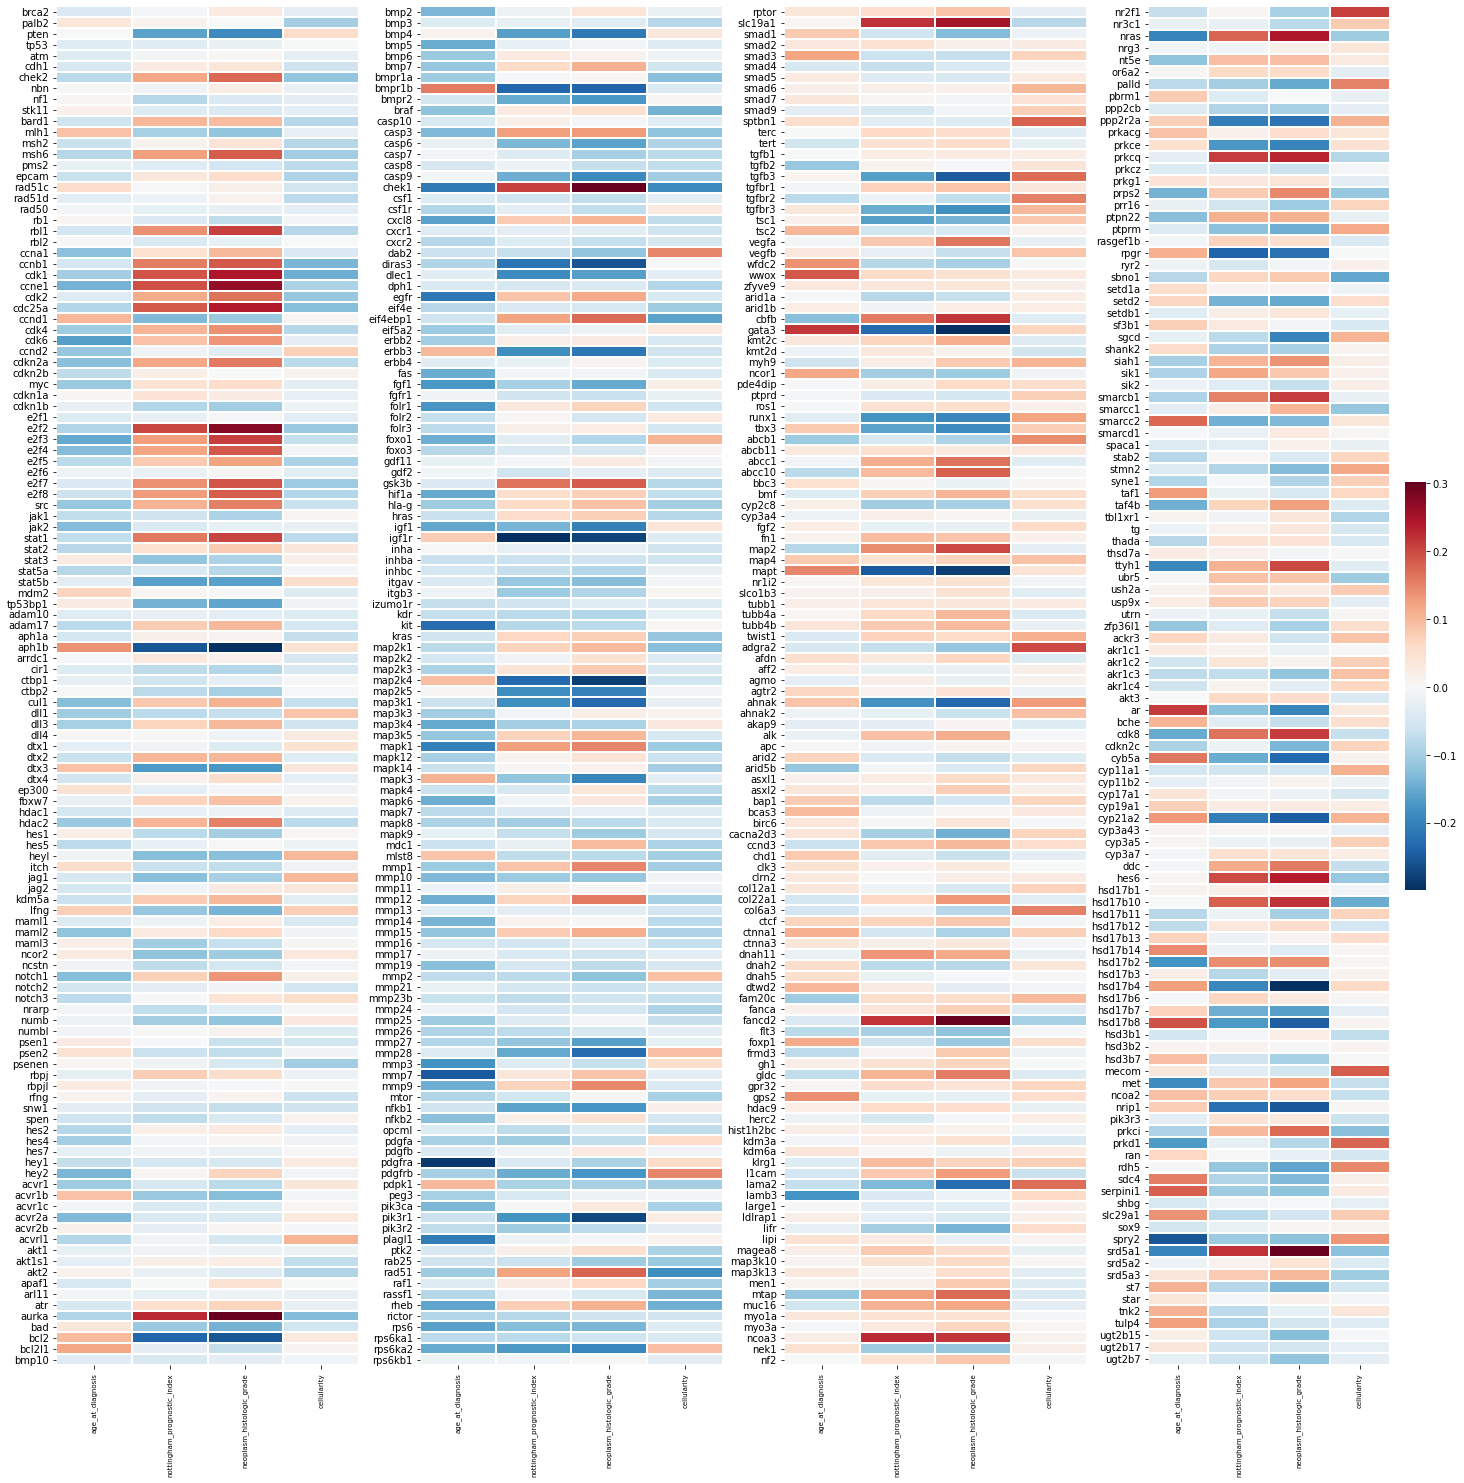

In [112]:
#Make a heatmap for the correlation
f, axes = plt.subplots(1, 4, figsize=(25,25), sharex=False)
#plt.figure(figsize=(3,100))
sns.heatmap(corr3.iloc[:-4,-4:][1:125], cmap = "RdBu_r",linewidths=0.1, cbar = False, ax=axes[0])
sns.heatmap(corr3.iloc[:-4,-4:][126:250], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[1])
sns.heatmap(corr3.iloc[:-4,-4:][251:375], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[2])
sns.heatmap(corr3.iloc[:-4,-4:][376:489], cmap = "RdBu_r",linewidths=0.1, cbar_kws={"shrink": .3}, ax=axes[3])

plt.savefig('corr_clinic1_gene.png', dpi=300)

In [113]:
cdf2 = clinic_df[['radio_therapy', 'hormone_therapy', 'type_of_breast_surgery', 'chemotherapy']]

In [114]:
edf2 = pd.concat([expression_df,cdf2], axis=1)

In [115]:
corr4 = edf2.corr()

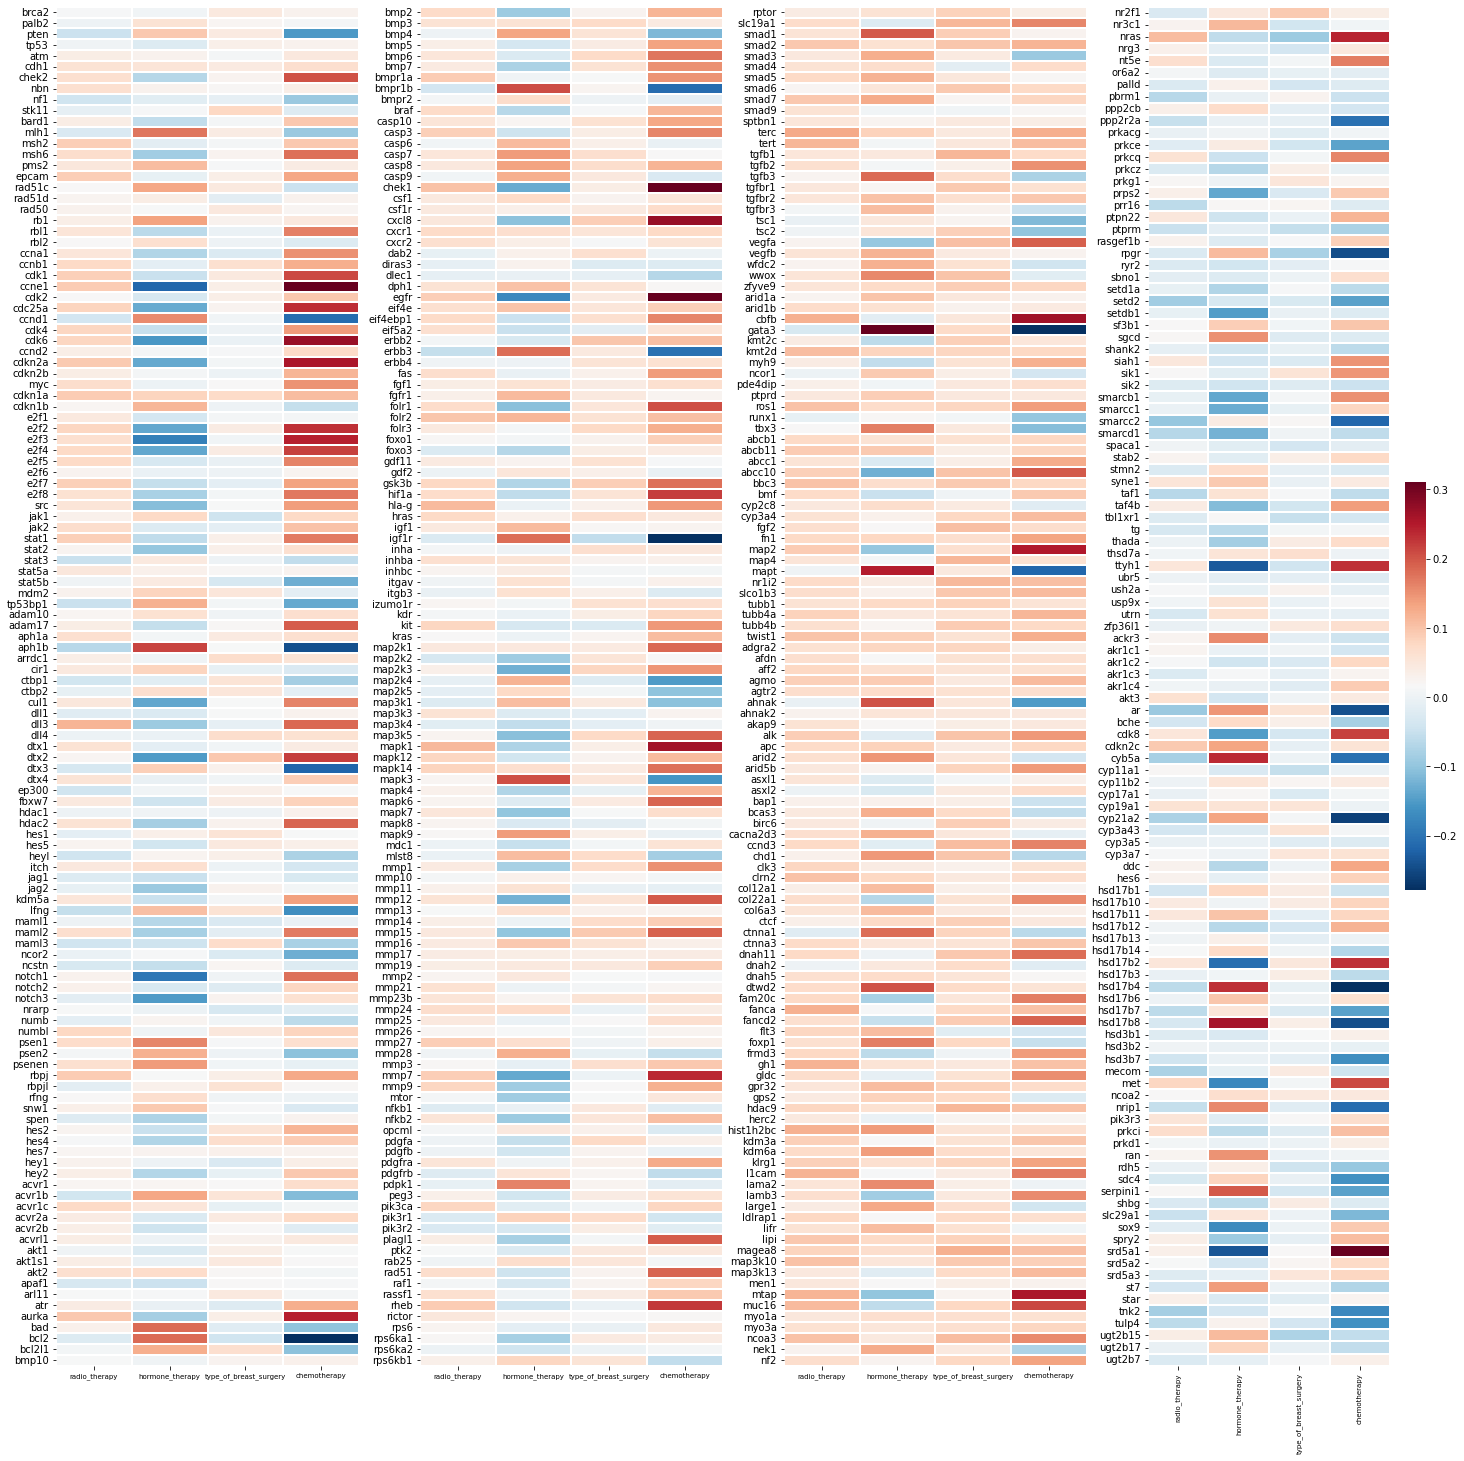

In [116]:
#Make a heatmap for the correlation
f, axes = plt.subplots(1, 4, figsize=(25,25), sharex=False)

sns.heatmap(corr4.iloc[:-4,-4:][1:125], cmap = "RdBu_r",linewidths=0.1, cbar = False, ax=axes[0])
sns.heatmap(corr4.iloc[:-4,-4:][126:250], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[1])
sns.heatmap(corr4.iloc[:-4,-4:][251:375], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[2])
sns.heatmap(corr4.iloc[:-4,-4:][376:489], cmap = "RdBu_r",linewidths=0.1, cbar_kws={"shrink": .3}, ax=axes[3])

plt.savefig('corr_clinic2_gene.png', dpi=300)

In [117]:
edf3 = pd.concat([expression_df,cdf3], axis=1)

In [118]:
corr4 = edf3.corr()

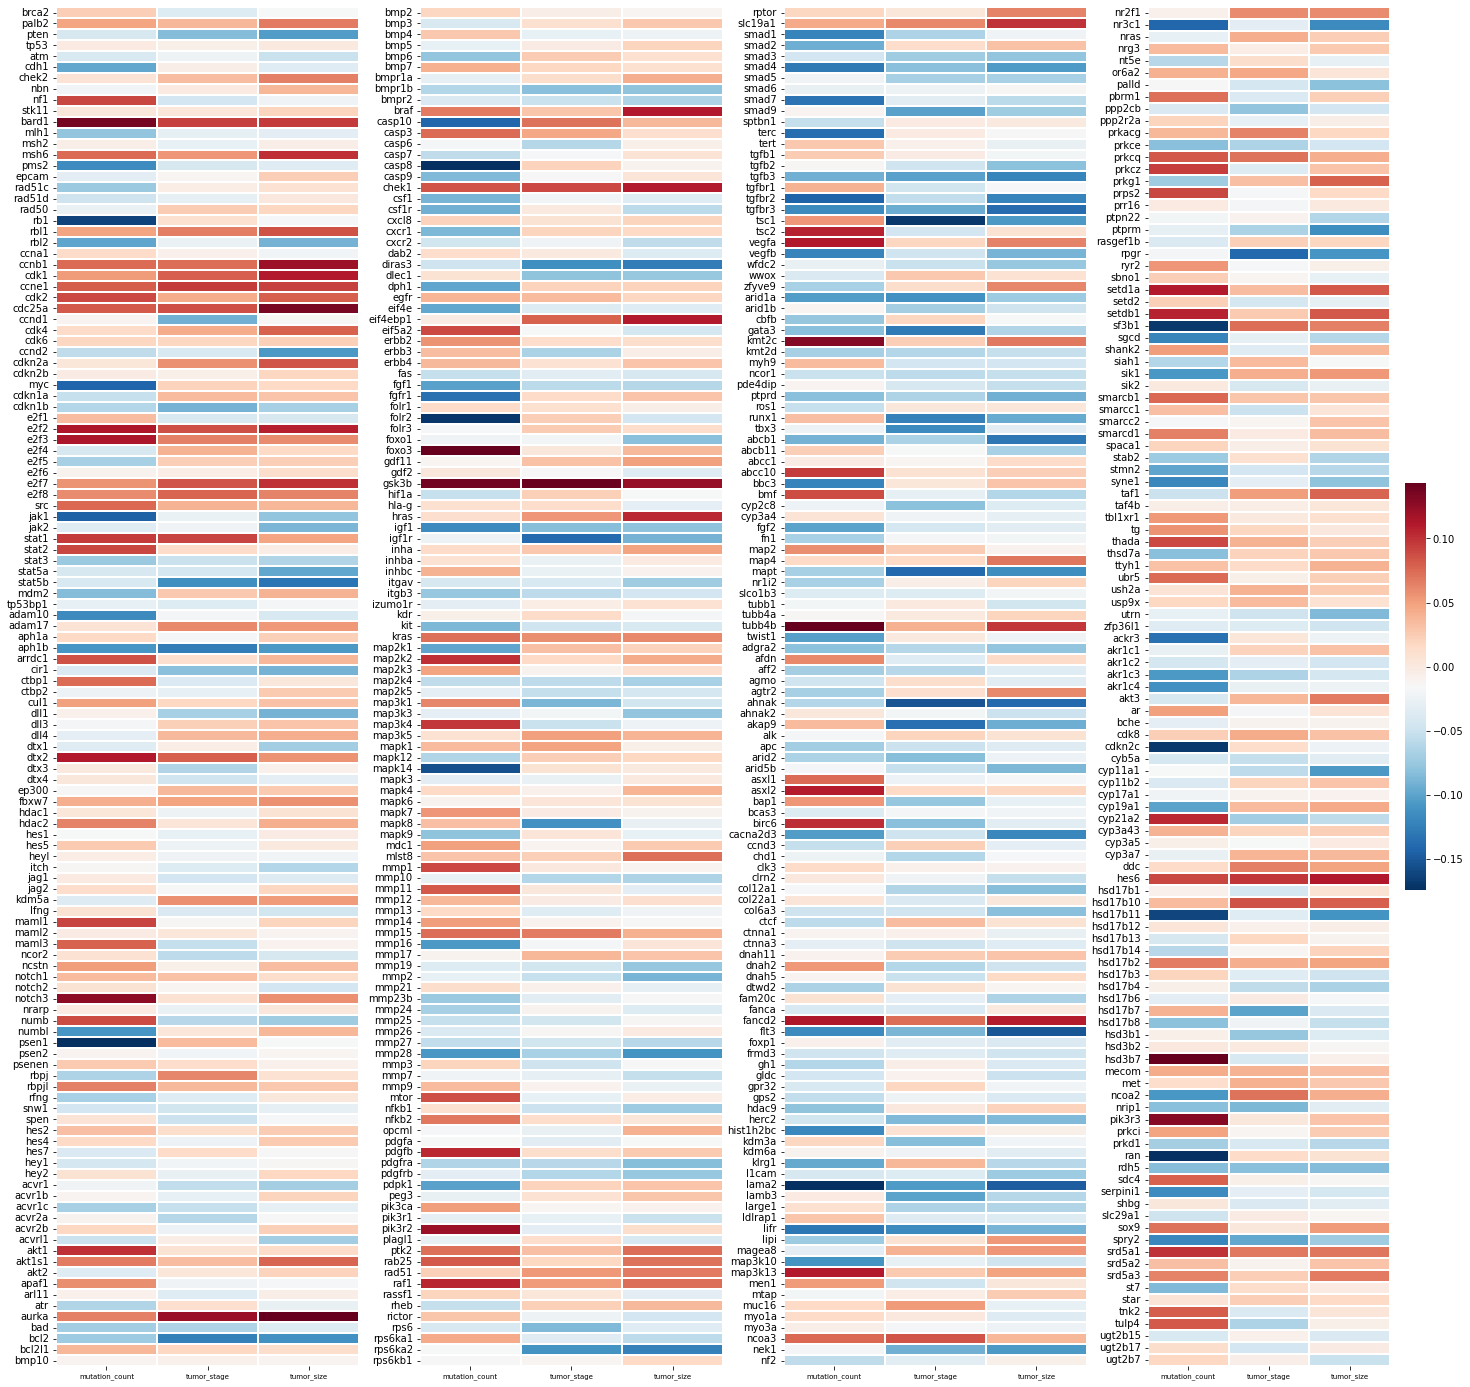

In [119]:
#Make a heatmap for the correlation
f, axes = plt.subplots(1, 4, figsize=(25,25), sharex=False)
#plt.figure(figsize=(3,100))
sns.heatmap(corr4.iloc[:-3,-3:][1:125], cmap = "RdBu_r",linewidths=0.1, cbar = False, ax=axes[0])
sns.heatmap(corr4.iloc[:-3,-3:][126:250], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[1])
sns.heatmap(corr4.iloc[:-3,-3:][251:375], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[2])
sns.heatmap(corr4.iloc[:-3,-3:][376:489], cmap = "RdBu_r",linewidths=0.1, cbar_kws={"shrink": .3}, ax=axes[3])

plt.savefig('corr_clinic3_gene.png', dpi=300)

In [120]:
# This is a list of cilnical features, which does not show strong correlationship with genes 
# in the gene expression data
selected_cdf = clinic_df[['age_at_diagnosis', 'cellularity', 'radio_therapy', 'hormone_therapy', 
                          'type_of_breast_surgery', 'tumor_stage']]

In [121]:
edf_plus = pd.concat([expression_df,selected_cdf], axis=1)

In [122]:
X = edf_plus.drop(columns='overall_survival')
y = edf_plus['overall_survival']

In [123]:
smote = SMOTE(random_state = 10)
x_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=3,
                                                   shuffle = True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1121, 495), X_test size: (481, 495)


In [125]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', random_state=15),
            'parameters': {
                'C': [1,5,10]
               }
        },
        'support_vector_classifier': {
            'model': SVC(gamma='auto', random_state=15),
            'parameters': {
                'C': [0.1,1,5,10],
                'kernel': ['rbf', 'poly', 'sigmoid']
               }
        },    
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state=15),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20],
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state=15),
            'parameters': {
                'max_depth': [5,10,20],
                'n_estimators': [10,15,20,50,100,200], 
            }
        },

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = 4, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 10},0.653857
1,support_vector_classifier,"{'C': 5, 'kernel': 'rbf'}",0.703848
2,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.614638
3,random_forest,"{'max_depth': 10, 'n_estimators': 100}",0.695819


Support vector machine, again, showes the highest accuracies and the accuracy also improved from 69.7 to 70.4.

In [126]:
X = edf_plus.drop(columns='overall_survival')
y = edf_plus['overall_survival']

smote = SMOTE(random_state = 10)
x_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30, random_state=3,
                                                   shuffle = True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'gamma': ['auto'], 
    'C': [1,5,10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
# Create a based model
scvm = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = scvm, param_grid = param_grid, 
                          cv = 4, refit=True, verbose = 2)

In [131]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=   0.3s
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1, gamma=auto, ker

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': ['auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [132]:
grid_search.best_params_

{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}

In [133]:
grid_search.best_score_

0.706513726487036

In [134]:
score = grid_search.score(X_test, y_test)
print('testing dataset accuracy:; ', score)

testing dataset accuracy:;  0.7297297297297297


## Conclusion

The best accuracy was attained when I used clinical data only, which was 83%

There was actually no improvement when I combined clincal data with gene expression data.

For future study, I would like to more fine feature selections on both the clincial data and gene expression data to see if it helps to improve the accuracy to predict the survival of breast cancer patients.

[Move Top](#Introduction)
<a herf='#Introduction'></a>